<a href="https://colab.research.google.com/github/Matheusmatos2916/regressao-linear-para-prever-valores-de-casas/blob/main/regressao_linear_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
#Importar bibliotecas
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
#Importar base de dados
base_D = pd.read_csv("house_prices.csv")

In [2]:
#Mostrar os dados iniciais do csv
base_D.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Contar o total em cada categoria do banco de dados
base_D.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [4]:
#Mostrar o total de registros e o total de categorias
base_D.shape

(21613, 21)

In [5]:
#Buscar a categoria que deseja analisar - (Metros quadrados)
Metros_Q = base_D.iloc[:, 5].values
Metros_Q = Metros_Q.reshape(-1,1)

In [6]:
#visualizar o shape
Metros_Q.shape

(21613, 1)

In [7]:
#Exibir dados
Metros_Q

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [8]:
#Buscar a categoria que deseja analisar - (Preço das casas)
Preco_C = base_D.iloc[:, 2:3].values


In [9]:
#Visualizar o shape
Preco_C.shape

(21613, 1)

In [10]:
#Realizar o escalonamento dos valores
scaler_x = StandardScaler()
Metros_Q = scaler_x.fit_transform(Metros_Q)
scaler_y = StandardScaler()
Preco_C = scaler_y.fit_transform(Preco_C)

In [11]:
#Verificar escalonamento em Metros_Q
Metros_Q

array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       ...,
       [-1.15404732],
       [-0.52252773],
       [-1.15404732]])

In [12]:
#Verificar escalonamento em Preco_C
Preco_C

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

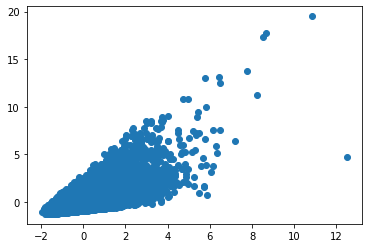

In [13]:
plt.scatter(Metros_Q, Preco_C)

# Fórmula da regressão linear simples
Preco_C = b0+b1*Metros_Q

In [36]:
#Gerar parâmetros - b0 e b1
np.random.seed(1)
np.random.rand(2)


array([0.417022  , 0.72032449])

In [37]:
#criar váriaveis para coeficientes
b0 = tf.Variable(0.41)
b1 = tf.Variable(0.72)

In [38]:
# Função para retornar a previsão usando a fórmula da regressão linear
def linear_regression(x):
    return b0 + b1 * x


In [39]:
# Mean square error
def error(y_pred, y_true):
    return tf.reduce_mean(tf.pow(y_pred - y_true, 2))

In [40]:
# Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate = 0.001)

In [41]:
batch_size = 32

In [47]:
# Treinamento
for i in range(10000):
    indices = np.random.randint(len(Metros_Q), size = batch_size)
    # Agrupa a computação dentro de um GradientTape
    with tf.GradientTape() as g:
        pred = linear_regression(Metros_Q[indices])
        loss = error(pred, Preco_C[indices])

    # Computa os gradientes
    gradients = g.gradient(loss, [b1, b0])

    # Atualiza b1 e b0 seguindo os gradientes
    optimizer.apply_gradients(zip(gradients, [b1, b0]))

In [48]:
#imprimir os valores do coefinciente - b0
b0

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0006077992>

In [49]:
#imprimir os valores do coefinciente - b1
b1

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7022631>

In [50]:
previsoes = b0 + b1 *Metros_Q

In [51]:
previsoes

<tf.Tensor: shape=(21613, 1), dtype=float32, numpy=
array([[-0.6874942 ],
       [ 0.37535954],
       [-1.0009978 ],
       ...,
       [-0.8098371 ],
       [-0.36634418],
       [-0.8098371 ]], dtype=float32)>

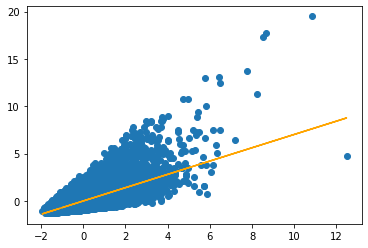

In [54]:
#Representação gráfica
plt.plot(Metros_Q, Preco_C,'o' )
plt.plot(Metros_Q, previsoes, color = 'orange')

In [56]:
#Reverter o escalonamento
Preco_C1 = scaler_y.inverse_transform(Preco_C)
previsoes1 = scaler_y.inverse_transform(previsoes)

In [58]:
Preco_C1

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [61]:
previsoes1

array([[287696.15588139],
       [677889.64756226],
       [172603.13424174],
       ...,
       [242781.79476539],
       [405596.34013464],
       [242781.79476539]])

In [63]:
# Mean Absolute Error - MAE
MAE = mean_absolute_error(Preco_C1, previsoes1)
MAE

173724.40095547042